In [1]:
from src.graph_independence import GraphIndependence
import networkx as nx
import matplotlib.pyplot as plt

## Exercise 1.1

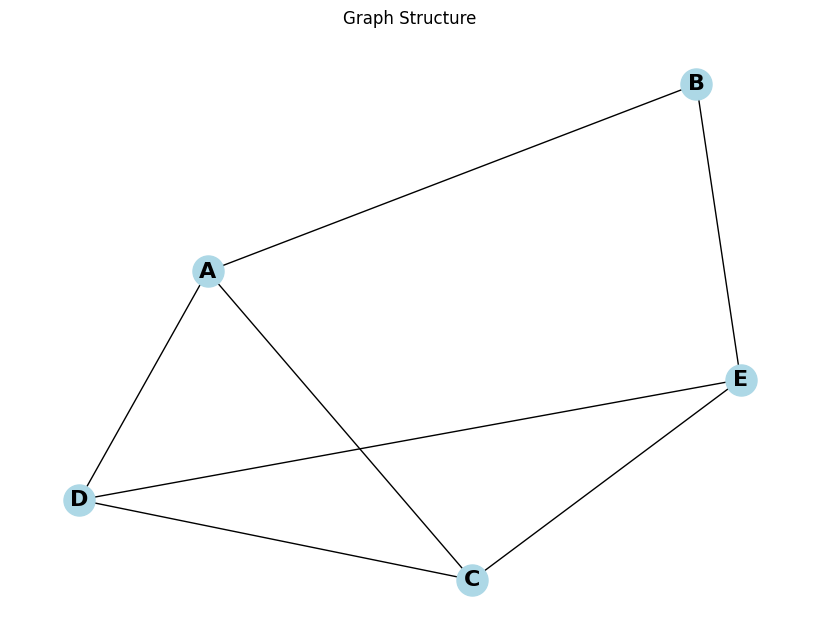

In [2]:
# Create a new graph
G = nx.Graph()

# Add nodes and edges
nodes = ['A', 'B', 'C', 'D', 'E']
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('C', 'D'), ('B', 'E'), ('C', 'E'),
    ('D', 'E')
]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=16, font_weight='bold')
plt.title("Graph Structure")
plt.show()


In [3]:
# Initialize the graph
gi = GraphIndependence(nodes, edges)

# Define all relationships to check
relationships = [
    ('A', 'B', None),
    ('A', 'D', None),
    ('B', 'C', None),
    ('C', 'D', None),
    ('A', 'E', None),
    ('B', 'C', {'A'}),
    ('B', 'D', {'C'}),
    ('B', 'C', {'A', 'E'}),
    ('B', 'D', {'A', 'E'}),
    ('A', 'E', {'B', 'C'}),
    ('A', 'E', {'B', 'C', 'D'}),
    ('B', 'C', {'A', 'D', 'E'})
]

# Analyze each relationship
for X, Y, observed in relationships:
    print(gi.analyze_relationship(X, Y, observed))
    print("-" * 50)


IG(A, B): False
Paths:
- A -> B: Active
- A -> C -> D -> E -> B: Blocked
- A -> C -> E -> B: Blocked
- A -> D -> C -> E -> B: Blocked
- A -> D -> E -> B: Blocked

--------------------------------------------------
IG(A, D): False
Paths:
- A -> B -> E -> C -> D: Blocked
- A -> B -> E -> D: Blocked
- A -> C -> D: Blocked
- A -> C -> E -> D: Blocked
- A -> D: Active

--------------------------------------------------
IG(B, C): True
Paths:
- B -> A -> C: Blocked
- B -> A -> D -> C: Blocked
- B -> A -> D -> E -> C: Blocked
- B -> E -> C: Blocked
- B -> E -> D -> A -> C: Blocked
- B -> E -> D -> C: Blocked

--------------------------------------------------
IG(C, D): False
Paths:
- C -> A -> B -> E -> D: Blocked
- C -> A -> D: Blocked
- C -> D: Active
- C -> E -> B -> A -> D: Blocked
- C -> E -> D: Blocked

--------------------------------------------------
IG(A, E): True
Paths:
- A -> B -> E: Blocked
- A -> C -> D -> E: Blocked
- A -> C -> E: Blocked
- A -> D -> C -> E: Blocked
- A -> D -> 

## Exercise 1.2

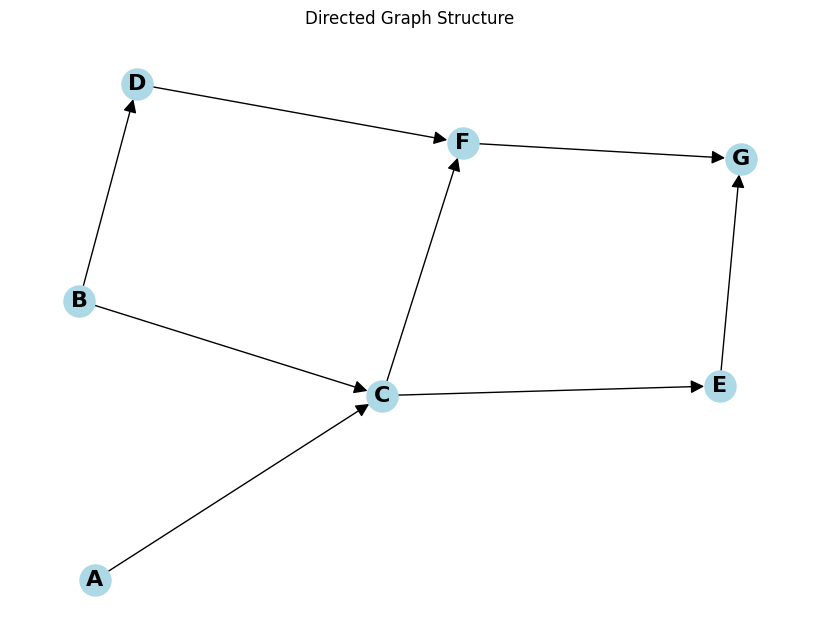

In [8]:
from src.graph_independence import DirectedGraphIndependence
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph structure
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
edges = [
    ('A', 'C'), ('B', 'C'), ('B', 'D'),
    ('C', 'E'), ('C', 'F'), ('D', 'F'),
    ('E', 'G'), ('F', 'G')
]

# Create and draw the directed graph
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue',
        node_size=500, font_size=16, font_weight='bold',
        arrows=True, arrowsize=20)
plt.title("Directed Graph Structure")
plt.show()

In [5]:


# Initialize the directed graph
dgi = DirectedGraphIndependence(nodes, edges)

# Part 1: Unconditional independence relationships
print("Part 1: Unconditional Independence Relationships")
print("=" * 50)

relationships_part1 = [
    ('A', 'B', None),   # a)
    ('A', 'C', None),   # b)
    ('A', 'D', None),   # c)
    ('A', 'E', None),   # d)
    ('A', 'G', None),   # e)
    ('D', 'E', None),   # f)
    ('C', 'G', None)    # g)
]

for X, Y, observed in relationships_part1:
    print(dgi.analyze_relationship(X, Y, observed))
    print("-" * 50)

# Part 2: Conditional independence relationships
print("\nPart 2: Conditional Independence Relationships")
print("=" * 50)

relationships_part2 = [
    ('A', 'B', {'C'}),           # a)
    ('A', 'B', {'E'}),           # b)
    ('A', 'B', {'F'}),           # c)
    ('A', 'B', {'G'}),           # d)
    ('A', 'D', {'C'}),           # e)
    ('A', 'D', {'E'}),           # f)
    ('A', 'F', {'C'}),           # g)
    ('A', 'F', {'E'}),           # h)
    ('A', 'F', {'G'}),           # i)
    ('A', 'E', {'F'}),           # j)
    ('B', 'E', {'C', 'D'}),      # k)
    ('B', 'G', {'D', 'E'}),      # l)
    ('D', 'E', {'C', 'G'}),      # m)
    ('B', 'F', {'A', 'D', 'G'})  # n)
]

for X, Y, observed in relationships_part2:
    print(dgi.analyze_relationship(X, Y, observed))
    print("-" * 50)

Part 1: Unconditional Independence Relationships
IG(A, B): True
Paths:

--------------------------------------------------
IG(A, C): False
Paths:
- A -> C: Active

--------------------------------------------------
IG(A, D): True
Paths:

--------------------------------------------------
IG(A, E): False
Paths:
- A -> C -> E: Active

--------------------------------------------------
IG(A, G): False
Paths:
- A -> C -> E -> G: Active
- A -> C -> F -> G: Active

--------------------------------------------------
IG(D, E): True
Paths:

--------------------------------------------------
IG(C, G): False
Paths:
- C -> E -> G: Active
- C -> F -> G: Active

--------------------------------------------------

Part 2: Conditional Independence Relationships
IG(A, B|C): True
Paths:

--------------------------------------------------
IG(A, B|E): True
Paths:

--------------------------------------------------
IG(A, B|F): True
Paths:

--------------------------------------------------
IG(A, B|G): True